In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn as sk

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_parquet('us_housing.parquet')

In [3]:
df

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
...,...,...,...,...,...,...,...
4995,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4996,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4997,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4998,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


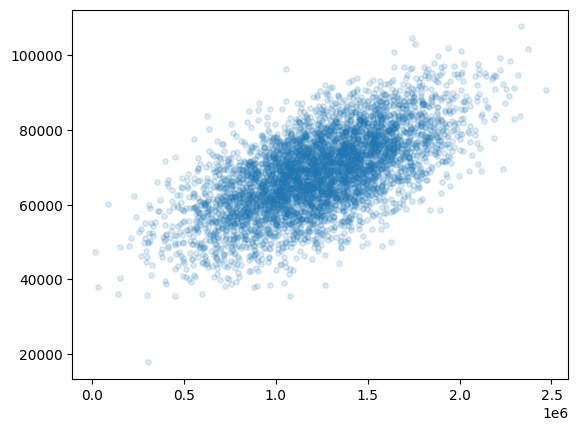

In [4]:
plt.scatter(df['Price'], df['Avg. Area Income'], s=15, alpha=.15)
plt.show()

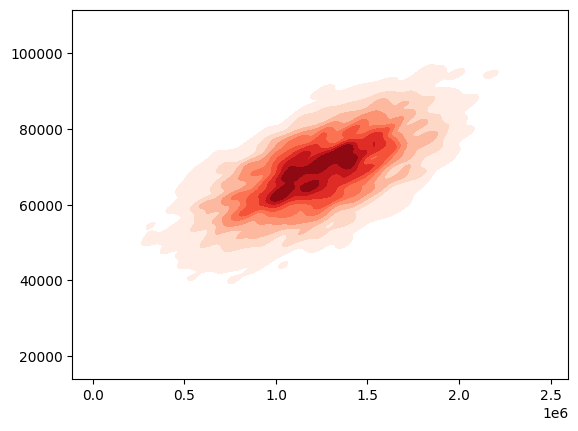

In [11]:
sns.kdeplot(x=rx.reshape(-1), y=ry.reshape(-1), cmap="Reds", shade=True, bw_adjust=.5)
plt.show()

In [5]:
x = np.array(df['Price'])
y = np.array(df['Avg. Area Income'])

In [6]:
np.cov(x,y)

array([[1.24692058e+11, 2.40765379e+09],
       [2.40765379e+09, 1.13592777e+08]])

In [7]:
np.corrcoef(x,y)

array([[1.        , 0.63973378],
       [0.63973378, 1.        ]])

In [8]:
rx = x.reshape(-1, 1)
ry = y.reshape(-1, 1)

regress_model = LinearRegression()
regress_model.fit(rx,ry)

LinearRegression()

In [9]:
y_predicted = regress_model.predict(rx)
rmse = np.sqrt(mean_squared_error(ry, y_predicted))

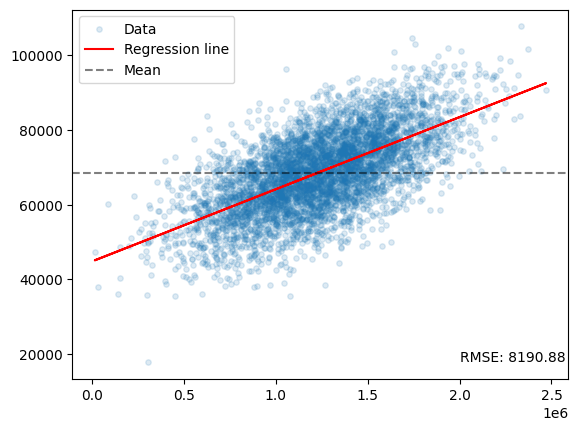

In [15]:
plt.scatter(rx, ry, s=15, alpha=.15, label='Data')
plt.plot(rx, y_predicted, color='r', label='Regression line')

plt.axhline(y=np.mean(y), color='k', alpha=.5, linestyle='--', label='Mean')

plt.text(2e6, 18000, f'RMSE: {rmse:.2f}')
plt.legend()
plt.show()